
![TMDB Pic](https://i.imgur.com/bNEXCj3.jpg)

# Project: Investigate a Dataset - The TMDB Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
    <ul>
        <li><a href="#getting-ready">Getting Ready</a></li>
        <li><a href="#getting-sense">Getting sense of source data</a></li>
        <li><a href="#questions">Questions for data analysis</a></li>
        <ul>
            <li><a href="#growth">Questions related to growth of movie industry</a></li>
             <li><a href="#relation">Questions related to relation between gross profit and other factors</a></li>
        </ul>
    </ul>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
        <li><a href="#check-column">Checking Column Names</a></li>
        <li><a href="#drop-column">Dropping Columns which are not required</a></li>
        <li><a href="#drop-duplicate">Cleaning duplicate records</a></li>
        <li><a href="#drop-null">Cleaning records with Null values</a></li>
        <li><a href="#drop-zero"> Cleaning records with 0 numeric values</a></li>
        <li><a href="#clean-datatypes">Cleaning Data Types</a></li>
    </ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
        <li><a href="#basic">Basic Exploration</a></li>
        <li><a href="#qp1">Questions related to growth of movie industry</a></li>
        <ul>
            <li><a href="#q1">Q.1 Does there is year on year growth in number of movies released?</a></li>
            <li><a href="#q2">Q.2 Does there is year on year growth in budget of movies?</a></li>
            <li><a href="#q3">Q.3 How does annual gross profit (Revenue - Budget) perform against budget of movies year on year?</a></li>
        </ul>
        <li><a href="#qp2">Questions related to relation between gross profit and other factors</a></li>
        <ul>
            <li><a href="#q4">Q.4 Does movie relasing in specific month(s) give more gross profit than movie relasing in other months?</a></li>
            <li><a href="#q5">Q.5 Which actors (Cast), director and genre gives very high gross profit movies?</a></li>
            <li><a href="#q6">Q.6 Is there any relation between runtime and high gross profit movies?</a></li>
        </ul>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
TMDB movie data provides information of around 10000 movies. I am fond of movies and this dataset looks very interesting for analysis. Questions for exploration is provided at the end of this section.

<a id='getting-ready'></a>
### Getting Ready
In this section we are setting up Python required libereries, packages and enviornment defaults. We are also creating a **dataframe** by loading _tmdb-movies.csv_ file which is uploaded in the working directory. 

After creation of DataFrame we are showing first 4 records. It will help us in understanding the structure of dataset.

In [1]:
# Import python packages and initialize Jupyter notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib magic configuration
% matplotlib inline

# Setting Notebook wide Visual Charts Size
plt.rcParams['figure.figsize'] = [15, 7]

# Setting seaborn theame for pleasant reports
sns.set_style('darkgrid')

# Setting column print options
pd.options.display.max_columns = None

In [2]:
# Creating DataFrame with CSV tmdb-movies.csv having TMDB movie data set
movies_df = pd.read_csv('tmdb-movies.csv')

In [3]:
# Seeing few records from beginning of DataFrame
movies_df.head(4)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


In the first 4 records of Movie DataFrame, we can observe the kind of information kept in each column. For e.g. homepage is keeping a Web URL, the cast is keeping the multiple actors' information and etc.

<a id='getting-sense'></a>
### Getting sense of source data
In this section, we will dig dipper to understand the attributes behaviour. We will find out the _size_ of the dataset and _column names_. After knowing them we will try to understand the use of each of the columns. It will help us in defining the right questions for exploration.

While understanding the use of columns we are also going to visit TMDB and Kaggle website.

In [4]:
# Finding Total Records (Rows) and Columns for the dataset

# Print total rows
print("Total number of rows in the data set is {}".format(movies_df['id'].count()))

# Print total columns
print("\nTotal number of columns in the data set is {}".format(len(movies_df.columns)))

# Print Column names
print("\nColumns:")
for idx, col in enumerate(movies_df.columns.values):
    print("{}. {}".format(idx+1, col))

Total number of rows in the data set is 10866

Total number of columns in the data set is 21

Columns:
1. id
2. imdb_id
3. popularity
4. budget
5. revenue
6. original_title
7. cast
8. homepage
9. director
10. tagline
11. keywords
12. overview
13. runtime
14. genres
15. production_companies
16. release_date
17. vote_count
18. vote_average
19. release_year
20. budget_adj
21. revenue_adj


I had gone through the dataset attributes and their values. I also referred to Kaggle and TMDB documentation. I found the following important points and assumptions related to the dataset:

1. There are total **10866 rows** and **21 columns** in dataset.
2. _cast_, _keywords_, _genres_ and _production_companies_ and _director_ column contains multiple values seperated by pipe (|).
3. Most of the column names are self explnatory and we don't need to research much to make sense of it. With only one exception:
   1. popularity - After visiting TMDB website we found Popularity is a rank given to movies based on the user activities like access to movie page, votes etc.
4. It is not mentioned the currency for budget, budget_adj, revenue and revenue_adj column. We are assuming it to **dollar**.
5. runtime value type is also not mentioned anywhere, we are assuming that to **minutes**.

<a id='questions'></a>
### Questions for data analysis

After doing basic research for the dataset, for this data analysis project I would like to explore dataset to find out the answer of following questions:

<a id='growth'></a>
#### Questions related to growth of movie industry:
   Q.1 Does there is year on year growth in number of movies released?

   Q.2 Does there is year on year growth in budget of movies?

   Q.3 How does annual gross profit (Revenue - Budget) perform against budget of movies year on year?

   *As a movie enthusiast, I am very curious to understand the growth of the Film industry year on year. These questions are important for other people who wanted to invest in the Film industry and wanted to understand the size and trends.*

<a id='relation'></a>
#### Questions related to relation between gross profit and other factors:
   Q.4 Does movie relasing in specific month(s) give more gross profit than movie relasing in other months?

   Q.5 Which actors (Cast), director and genre gives very high gross profit movies?

   Q.6 Is there any relation between runtime and high gross profit movies?

   *These questions are very important for film makers to make right decisions to increase the probability of financial success of the movie.*


<a id='wrangling'></a>
## Data Wrangling


<a id='check-column'></a>
### Checking Column Names

I have checked column names and they are following the required format. Hence there is no change required in the column name.

<a id='drop-column'></a>
### Dropping Columns which are not required

For our exploration we don't need columns *imdb_id*, *popularity*, *homepage*, *tagline*, *keywords*, *overview*, *production_companies*, *vote_count*, *vote_average*, *budget_adj*, *revenue_adj*.

Let's drop them for simplicity of the data set.

In [5]:
# Dropping columns, imdb_id, popularity, homepage, tagline, keywords, overview, production_companies, vote_count, vote_average budget_adj, revenue_adj

movies_df.drop(['imdb_id', 'popularity', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'vote_count','vote_average', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)


In [6]:
# See 2 rows to validate the changes
movies_df.head(2)

,id,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,135397,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,76341,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015


**Now we have 10 columns**

<a id='drop-duplicate'></a>
### Cleaning duplicate records

Check the duplicate records count and delete them if there are any.

In [7]:
# Check duplicate record 
sum(movies_df.duplicated())

1

This dataset is very clean and we found only one duplicate record. 

We will delete the duplicate record.

In [8]:
# Delete Duplicate
movies_df.drop_duplicates(inplace=True)

In [9]:
# Check duplicate count again to confirm if they are gone
sum(movies_df.duplicated())

0

**We can see there is no duplicates now. Our data set is without any duplicates now.**

<a id='drop-null'></a>
### Cleaning records with Null values

Null values in columns make data analysis buggy by impacting the mean and other metrics. Hence it's important to identify those columns which have Null values and drop them.

In [10]:
# Find the null count for every columns
movies_df.isnull().sum()

id                 0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
release_year       0
dtype: int64

**Column cast (76), director (44) and genres (23) have null values.**

Drop all those rows which have null values.

In [11]:
# Dropping rows with null values
movies_df.dropna(inplace=True)

In [12]:
# Check the null counts again to confirm if null values are gone
movies_df.isnull().sum()

id                0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
release_year      0
dtype: int64

**Now we don't have any null values in the dataset.**

<a id='drop-zero'></a>
### Cleaning records with 0 numeric values

In dataset budget, revenue and runtime numeric columns. It's important for us to check if their values are not full of zeros. Zeros in the columns often lead to miscalculation and we have to drop rows with them for the accuracy of the analysis.

We can easily find out the distribution of values using descriptive statistical information for all the numerical columns.

In [13]:
# Describe data frame will provide us descriptive statistics of the data set columns
movies_df.describe()

,id,budget,revenue,runtime,release_year
count,10731.000000,1.073100e+04,1.073100e+04,10731.000000,10731.000000
mean,65201.741869,1.480365e+07,4.031989e+07,102.468829,2001.259622
std,91470.508056,3.106456e+07,1.176524e+08,30.493873,12.820151
min,5.000000,0.000000e+00,0.000000e+00,0.000000,1960.000000
25%,10547.500000,0.000000e+00,0.000000e+00,90.000000,1995.000000
50%,20323.000000,0.000000e+00,0.000000e+00,99.000000,2006.000000
75%,73948.500000,1.600000e+07,2.500000e+07,112.000000,2011.000000
max,417859.000000,4.250000e+08,2.781506e+09,900.000000,2015.000000


Significant observations came from descriptive statistical analysis on columns:

1. budget column have 50% of its values as 0
2. revenue column have 50% of its values as 0
3. runtime column have 0 as values but it's count is samller than budget and revenue 0 count

Lets check the exact 0 values count for each column.

In [14]:
# Print number of 0 values in the budget column
print("Number of 0 values in budget column is {}".format(movies_df.query('budget == 0')['budget'].count()))

# Print number of 0 values in the revenue column
print("Number of 0 values in revenue column is {}".format(movies_df.query('revenue == 0')['revenue'].count()))

# Print number of 0 values in the runtime column
print("Number of 0 values in runtime column is {}".format(movies_df.query('runtime == 0')['runtime'].count()))


Number of 0 values in budget column is 5578
Number of 0 values in revenue column is 5888
Number of 0 values in runtime column is 28


**As suspected we can see budget and revenue column has abundant of 0 values. Whereas runtime has very small number of 0 values.**

We have to drop all these rows with 0 values. However it will reduce the size of our dataset substantially. But we will get accurate trends and results.

In [15]:
# Print the current dataset size

print("Number of rows before dropping 0 values is {}".format(movies_df.shape[0]))

# Convert column with 0 values to Null values, It is required for easy dropping if these rows

# Define list to keep the column names
to_replace = ['budget', 'revenue', 'runtime']

#Replace 0 with NaN (Null) values for passed columns
movies_df[to_replace] = movies_df[to_replace].replace(0, np.NaN)

# Now drop all the NaN values for passed columns
movies_df.dropna(subset = to_replace, inplace=True)

Number of rows before dropping 0 values is 10731


In [16]:
# Check the row count after drop operation

print("Number of rows after dropping 0 values is {}".format(movies_df.shape[0]))

Number of rows after dropping 0 values is 3849


**We can see number of rows has reduced to 3849 from 10731. It make our dataset smaller but more accurate.**

<a id='clean-datatype'></a>
### Cleaning Data Types

Source dataset often provide inconsistant data types for the values. We should check the datatype and make the approporiate data type conversion to make our dataset accurate.

In [17]:
# Check Data Types for columns
movies_df.dtypes

id                  int64
budget            float64
revenue           float64
original_title     object
cast               object
director           object
runtime           float64
genres             object
release_date       object
release_year        int64
dtype: object

**Few of the columns have inappropriate data type:**
1. *release_date* is *String* however it should be *datetime*.
2. *budget* is *float* however it should be *int* 
3. *revenue* is *float* however it should be *int* 
4. *runtime* is *float* however it should be *int* 

Note: Typically movie budget and revenue are whole number.

Let's make all these conversion in dataset.

In [18]:
# Convert release_date data type from String to Date

movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

In [19]:
# Convert budget, revenue, runtime column to int from float, we will use earlier defined to_replace list

movies_df[to_replace] = movies_df[to_replace].astype(np.int64)


In [20]:
# Check the datatype again to confirm the changes
movies_df.dtypes

id                         int64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

**Now all the data types are as required.**

Our first level of data wrangling is completed and dataset is cleaned enough to start doing the exploration.

<a id='eda'></a>
## Exploratory Data Analysis

<a id='basic'></a>
### Basic exploration

Let's start our exploration journey by viewing the basic descriptive statistics and histogram for columns (budget, revenue and runtime) with numeric data. It will give us overall understanding of the dataset.


In [21]:
# Descriptive statistics of the dataset
movies_df.describe()

,id,budget,revenue,runtime,release_year
count,3849.000000,3.849000e+03,3.849000e+03,3849.000000,3849.000000
mean,39885.146791,3.724886e+07,1.078148e+08,109.217459,2001.258249
std,67248.890597,4.221699e+07,1.766175e+08,19.914141,11.285642
min,5.000000,1.000000e+00,2.000000e+00,15.000000,1960.000000
25%,6072.000000,1.000000e+07,1.367069e+07,95.000000,1995.000000
50%,11313.000000,2.400000e+07,4.490726e+07,106.000000,2004.000000
75%,38575.000000,5.000000e+07,1.243052e+08,119.000000,2010.000000
max,417859.000000,4.250000e+08,2.781506e+09,338.000000,2015.000000


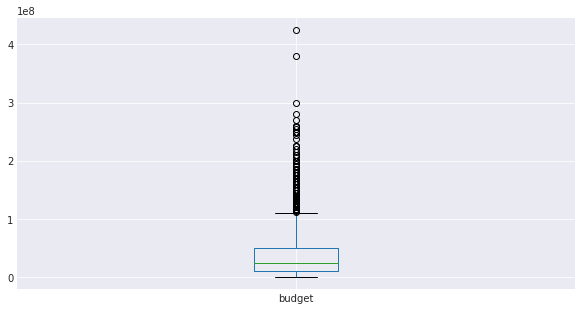

In [22]:
# budget attribute boxplot
movies_df.boxplot(column = ['budget'],figsize=(10,5));

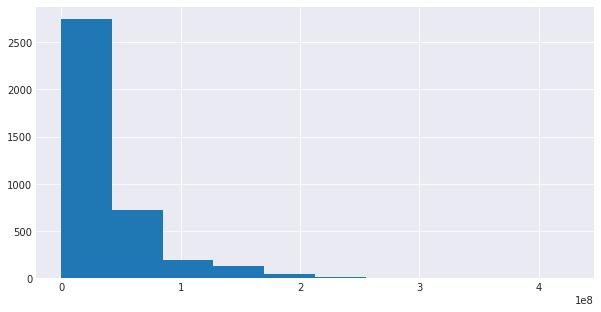

In [23]:
# budget attribute histogram
movies_df['budget'].hist(figsize=(10,5));

**Few important statistics for budget column:**

1. From descriptive stats, on an average budget of a movie in the data set is around 37 million dollar.
2. Maximum budget of a movie in the data set is  425 million dollar. It seems to be an outlier which we can see in boxplot chart.
4. Histogram shows that budget is not normally distributed and it is skewed on the right side. Budget of most of the movies (at least 3000) is less than 50 million dollar.

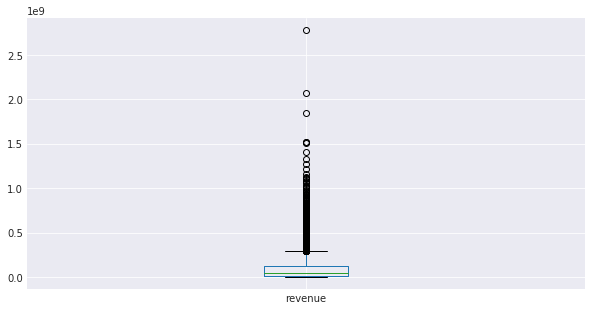

In [24]:
# revenue attribute boxplot
movies_df.boxplot(column = ['revenue'],figsize=(10,5));

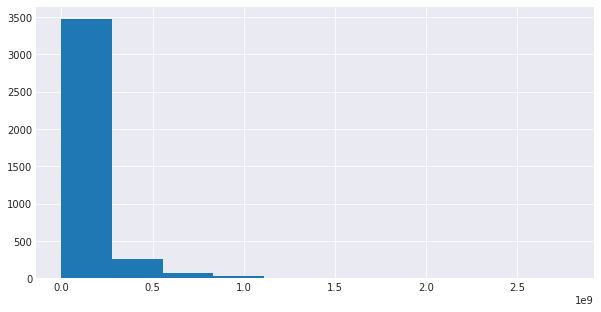

In [25]:
# revenue column histogram
movies_df['revenue'].hist(figsize=(10,5));

**Few important statistics for revenue column:**
1. From descriptive stats, on an average revenue of a movie in the data set is around 107 million dollar.
2. Maximum revnue of a movie in the data set is  2.7 billion dollar. It seems to be an outlier which we can see in boxplot chart.
4. Histogram shows that revnue is not normally distributed and it is skewed on the right side. Revenue of most of the movies (around 3500) is less than 250 million dollar.

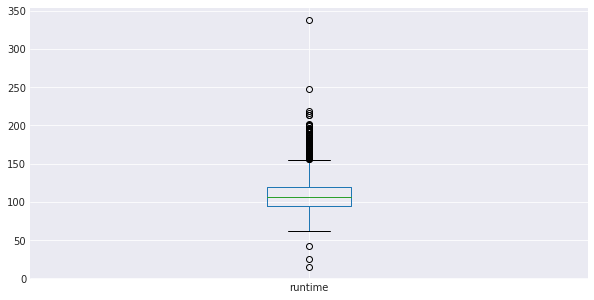

In [26]:
# runtime attribute boxplot
movies_df.boxplot(column = ['runtime'],figsize=(10,5));

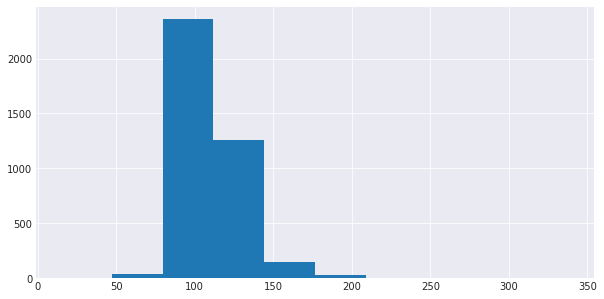

In [27]:
# runtime column histogram
movies_df['runtime'].hist(figsize=(10,5));

**Few important statistics for runtime column:**
1. From descriptive stats, on an average runtime of a movie 109 minutes, which is under 2 hours.
2. Maximum runtime of a movie in the data set is  338 minutes (More than 5.5 hours). It seems to be an outlier which we can see in boxplot chart.
4. Histogram shows that runtime is not normally distributed and it is skewed on the right side. runtime of most of the movies (around 2250) is under 110 minutes.

We can now move on exploring answers for the data analysis questions.

<a id='qp1'></a>
### Questions related to growth of movie industry

<a id='q1'></a>
#### Q.1 Does there is year on year growth in number of movies released?

Let's analyse year on year growth in number of movies released. 

In [28]:
# groupby on release_year and get count on column id and save it in another dataframe
movies_release_year_count_df = movies_df.groupby('release_year')['id'].count()


# Showing number of movies released against each year for 5 movies for verification
# We are not interested into specific year count but in trend
movies_release_year_count_df.head(5)

release_year
1960     5
1961    10
1962     7
1963     6
1964     7
Name: id, dtype: int64

In [29]:
# Common Method To Display Year On Year Growth Line Chart for various columns 
# like budget, revenue, gross_profit etc.

def year_on_year_line_chart(df, what_trend, df2 = None, what_trend2 = None):

    # Figure size and dpi
    plt.figure(figsize=(15, 7), dpi=150)

    # Defining tick labels range
    plt_xtick_labels = range(1960, 2020, 5)

    # Setting tick labels
    plt.xticks(
        np.arange(0,
                  len(df.values) + 1, 5), plt_xtick_labels, rotation=45)

    # Setting Plot title
    if what_trend2 is not None:
         plt.title('Yearwise {} Trends'.format(what_trend + " + " + what_trend2))
    else:
         plt.title('Yearwise {} Trends'.format(what_trend))
        
   
    # Setting X axis label
    plt.xlabel('Release Year')

    # Setting Y axis label, value is coming as parameter
    if what_trend2 is not None:
         plt.ylabel("Amount in $")
    else:
        plt.ylabel(what_trend)

    # Generate plot with values
    plt.plot(df.values, 'r-', label=what_trend)
        
    if df2 is not None:
        plt.plot(df2.values, 'g-', label=what_trend2)
       
    plt.legend()

**Generate line chart with yearwise trend of movie releases**

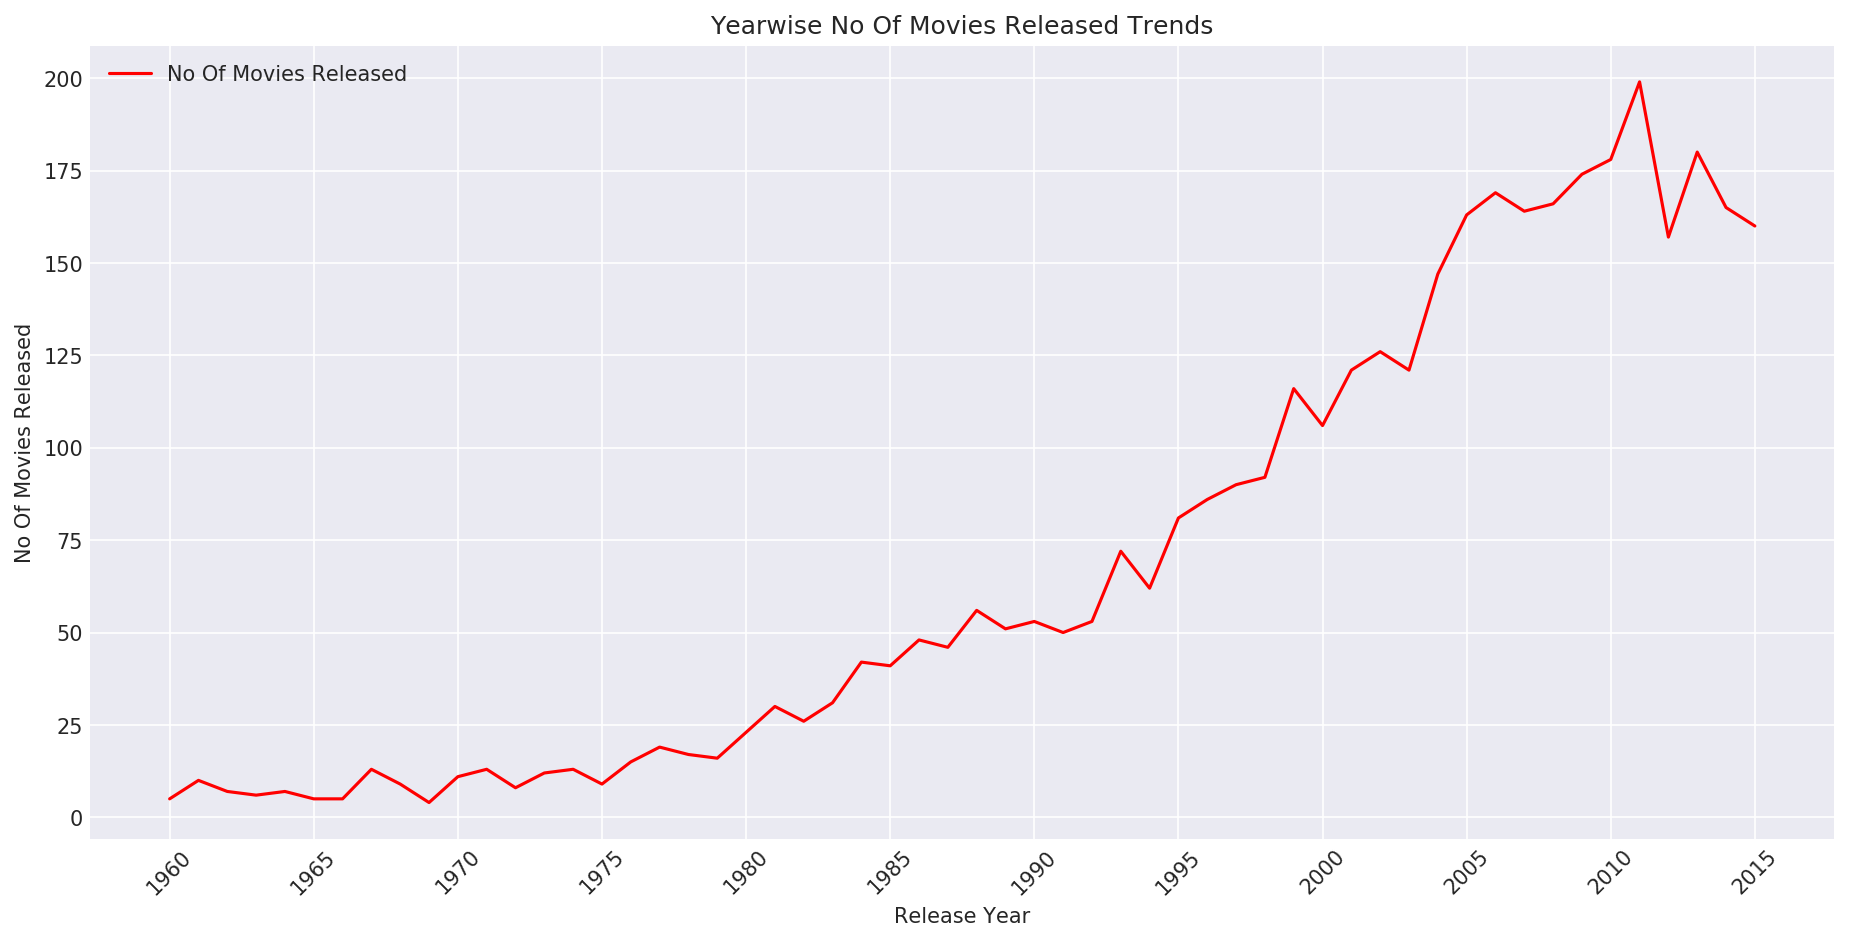

In [30]:
# Using common function year_on_year_line_chart to generate Yearwise trend of Movie Releases
year_on_year_line_chart(movies_release_year_count_df, "No Of Movies Released")

**Few important observations from year on year movies release count:**

1. As per this line chart we can say there is a significant growth in number of releases year after year. 

2. This data set provide information starting from 1960 to 2015.

3. Between year 1960 - 1980 number of movies releases each year was under 25. Whereas between year 2005 - 2015, number of movies released was between 150 - 200. It points towards the sudden growth in number of releases after 1980. 

Note: Our dataset now consider only around 3849 movies.

**We can also conclude the trend of increase in number of movies release year on year.**

<a id="q2"></a>
#### Q.2 Does there is year on year growth in budget of movies?

After analysing the number of releases year on year, let's analyse the trends in budget of movies year on year.


In [31]:
# groupby on release_year and sum on budget column and save it in another dataframe
movies_budget_sum_df = movies_df.groupby('release_year')['budget'].sum()
# Show Few initial records
movies_budget_sum_df.head(5)

release_year
1960    20806948
1961    38637000
1962    39450000
1963    61115000
1964    33935161
Name: budget, dtype: int64

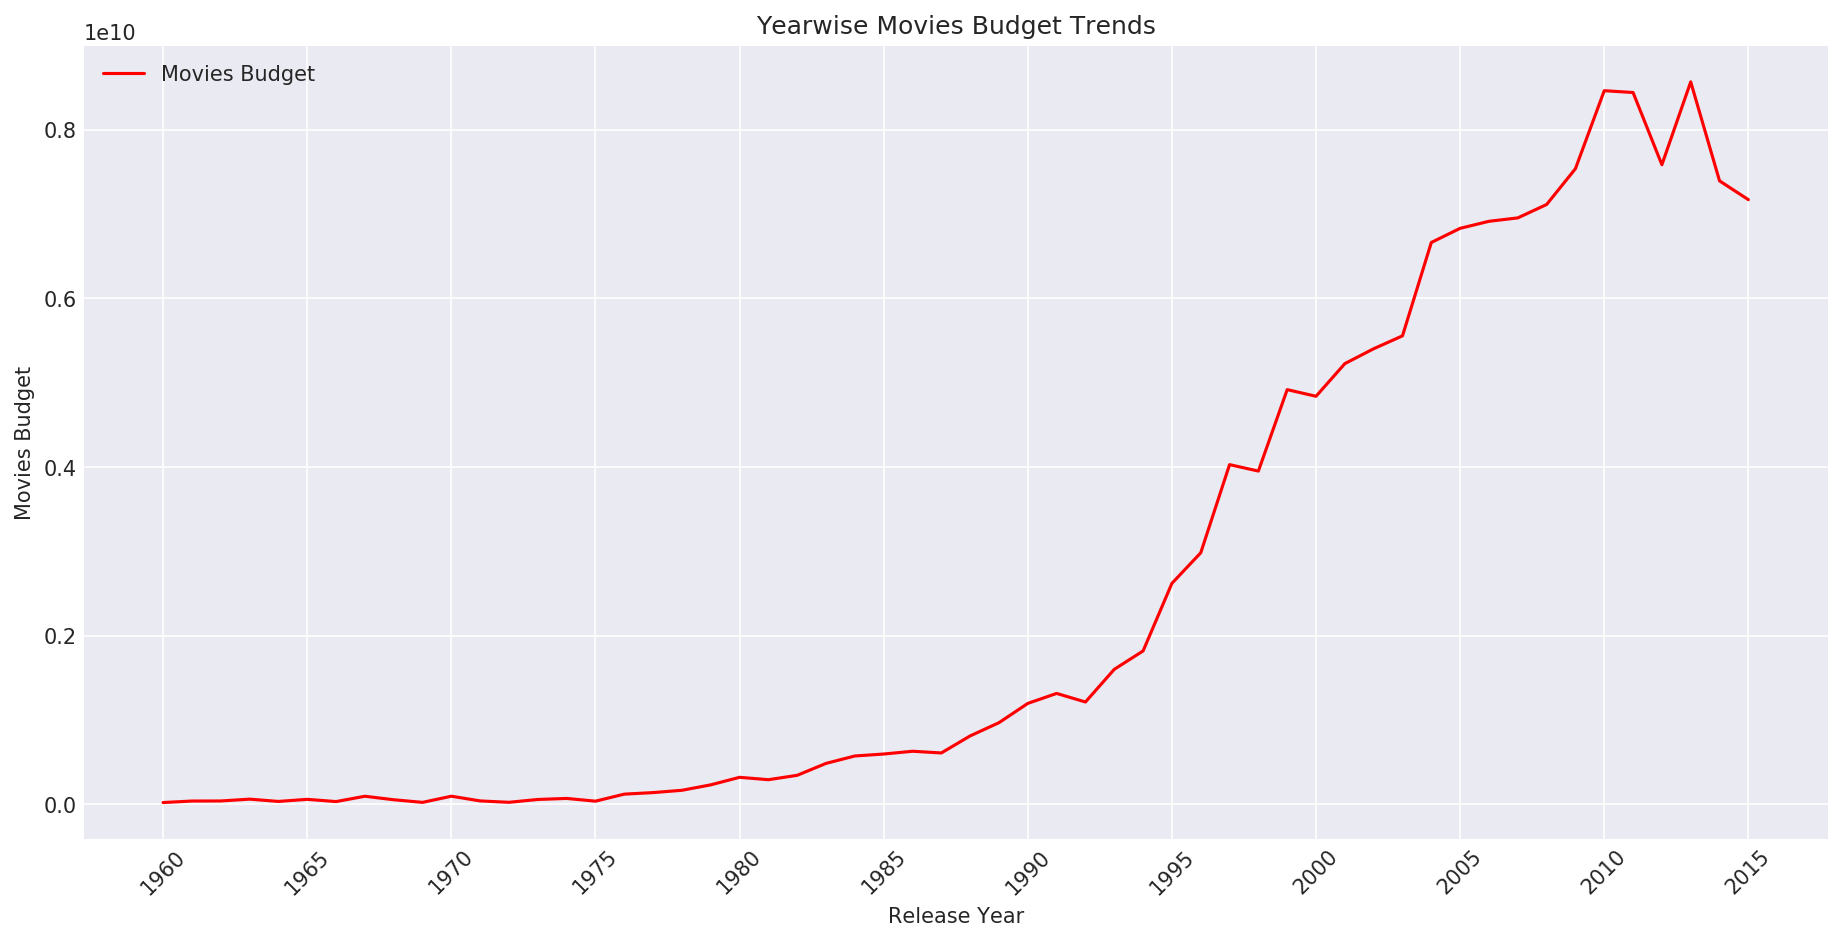

In [32]:
# Using common function year_on_year_line_chart to generateline 
# chart to depict yearwise movie budget trends
year_on_year_line_chart(movies_budget_sum_df, "Movies Budget")

**Few important observations from year on year movies budget trends:**

1. As per this line chart we can say there is a significant growth in film industry annual budget year after year. Specially After 1995 we are seeing a steep rise in the yearly budget and that trends continued till 2015.
2. Between year 1960 to 1995 annual budget of all movies were under 2.5 billion dollar. There is an year on year growth in budget.
3. Between year 1995 to 2015, annual budget rise from around 2.5 billion dollar to around 8.5 billion dollar. More than 200% percent of growth in 20 years.

Note: 
1. Our dataset now consider only around 3849 movies.
2. This data set provide information starting from 1960 to 2015.

**We can also conclude the trend of substantial increase in the yearly budget of all movies year on year.**

<a id="q3"></a>
#### Q.3 How does annual gross profit (Revenue - Budget) perform against budget of movies year on year?

let's analyse the performance of gross profit vs budget of movies year on year. It will gives us good picture of return on investment.

Let's create a new column **gross_profit** in dataset which will keep the differences between **revenue** and **budget**.

In [33]:
# Let's create a new column gross_profit in the movies dataframe which will keep the revenue - budget values
movies_df['gross_profit'] = movies_df['revenue'] - movies_df['budget']
# Validate the data set for new column
movies_df.head(4)

,id,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,gross_profit
0,135397,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810
1,76341,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,228436354
2,262500,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,185238201
3,140607,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1868178225


In [34]:
# groupby on release_year and sum on gross_profit column and save it in another dataframe
movies_gross_profit_sum_df = movies_df.groupby('release_year')['gross_profit'].sum()
movies_gross_profit_sum_df.head(5)

release_year
1960    108198052
1961    299083188
1962    166879846
1963    115411882
1964    294678387
Name: gross_profit, dtype: int64

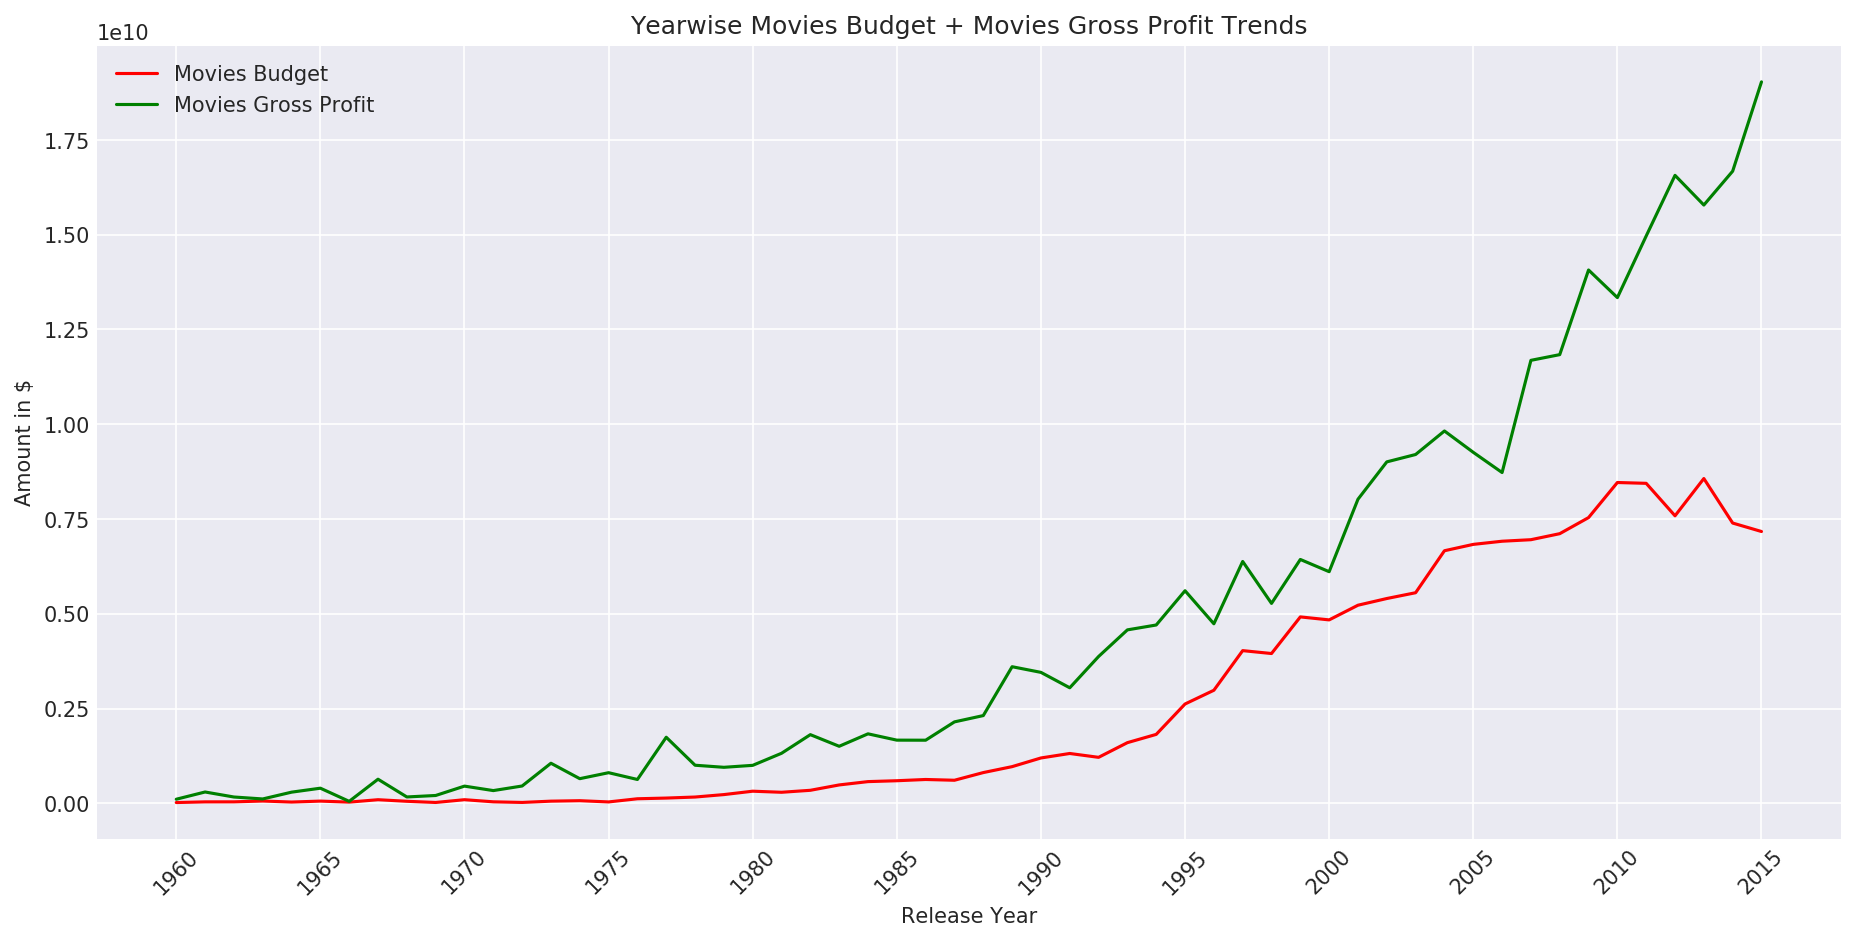

In [35]:
# Using common function year_on_year_line_chart to generate line 
# chart to depict yearwise movie gross profit and budget trends
year_on_year_line_chart(movies_budget_sum_df, "Movies Budget", movies_gross_profit_sum_df, "Movies Gross Profit")

**Few important observations from year on year movies budget and gross profit trends:**

1. As per this line chart we can say there is a significant growth in film industry annual gross profit year after year. Specially After 1995 we are seeing a steep rise in the yearly gross profit and that trends continued till 2015.
2. Between year 1960 to 1995 annual gross profit of all movies were under or around 5 billion dollar. However there is an year on year growth in gross profit.
3. Between year 1995 to 2015, annual gross profit rise from around 5 billion dollar to around 18 billion dollar. More than 350% percent of growth in 20 years.
4. Movies has always given good return on investment overall at the industry level. Year on year we can see the gross profit is always more than two times of budget (investment).
5. It is clear that Movie business is a profitable business with return on investment can be 150% on occasions. 

Note: 
1. Our dataset now consider only around 3849 movies.
2. This data set provide information starting from 1960 to 2015.

**We can conclude the gross profit is substantially higher than budget year on year. Hence Movie industry is a great industry for investment.**

<a id="qp2"></a>
### Questions related to relation between gross profit and other factors
<a id="q4"></a>
#### Q.4 Does movie relasing in specific month(s) give more gross profit than movie relasing in other months?

Let's analyse the trend of gross profit month wise. It will help in understanding if specific months are more profitable than others.

In [36]:
# Let's create a new column release_month with month value from release_date column
movies_df['release_month'] =  pd.DatetimeIndex(movies_df['release_date']).month

In [37]:
# Groupby on release_month and sum over gross_profit and save in a new dataframe
movies_month_wise_profit_df = movies_df.groupby('release_month')['gross_profit'].sum()

#Checkout few values
movies_month_wise_profit_df.head(12)

release_month
1      6865809318
2     10425802602
3     18302263238
4     15952540549
5     34552795170
6     43051063813
7     29529837533
8     13729731275
9     13502139404
10    17170747348
11    30351215470
12    38174402106
Name: gross_profit, dtype: int64

**In above output 1 means January and 12 mean December**

Let's create a bar chart to visualize the month wise gross profit in more readable fashion.

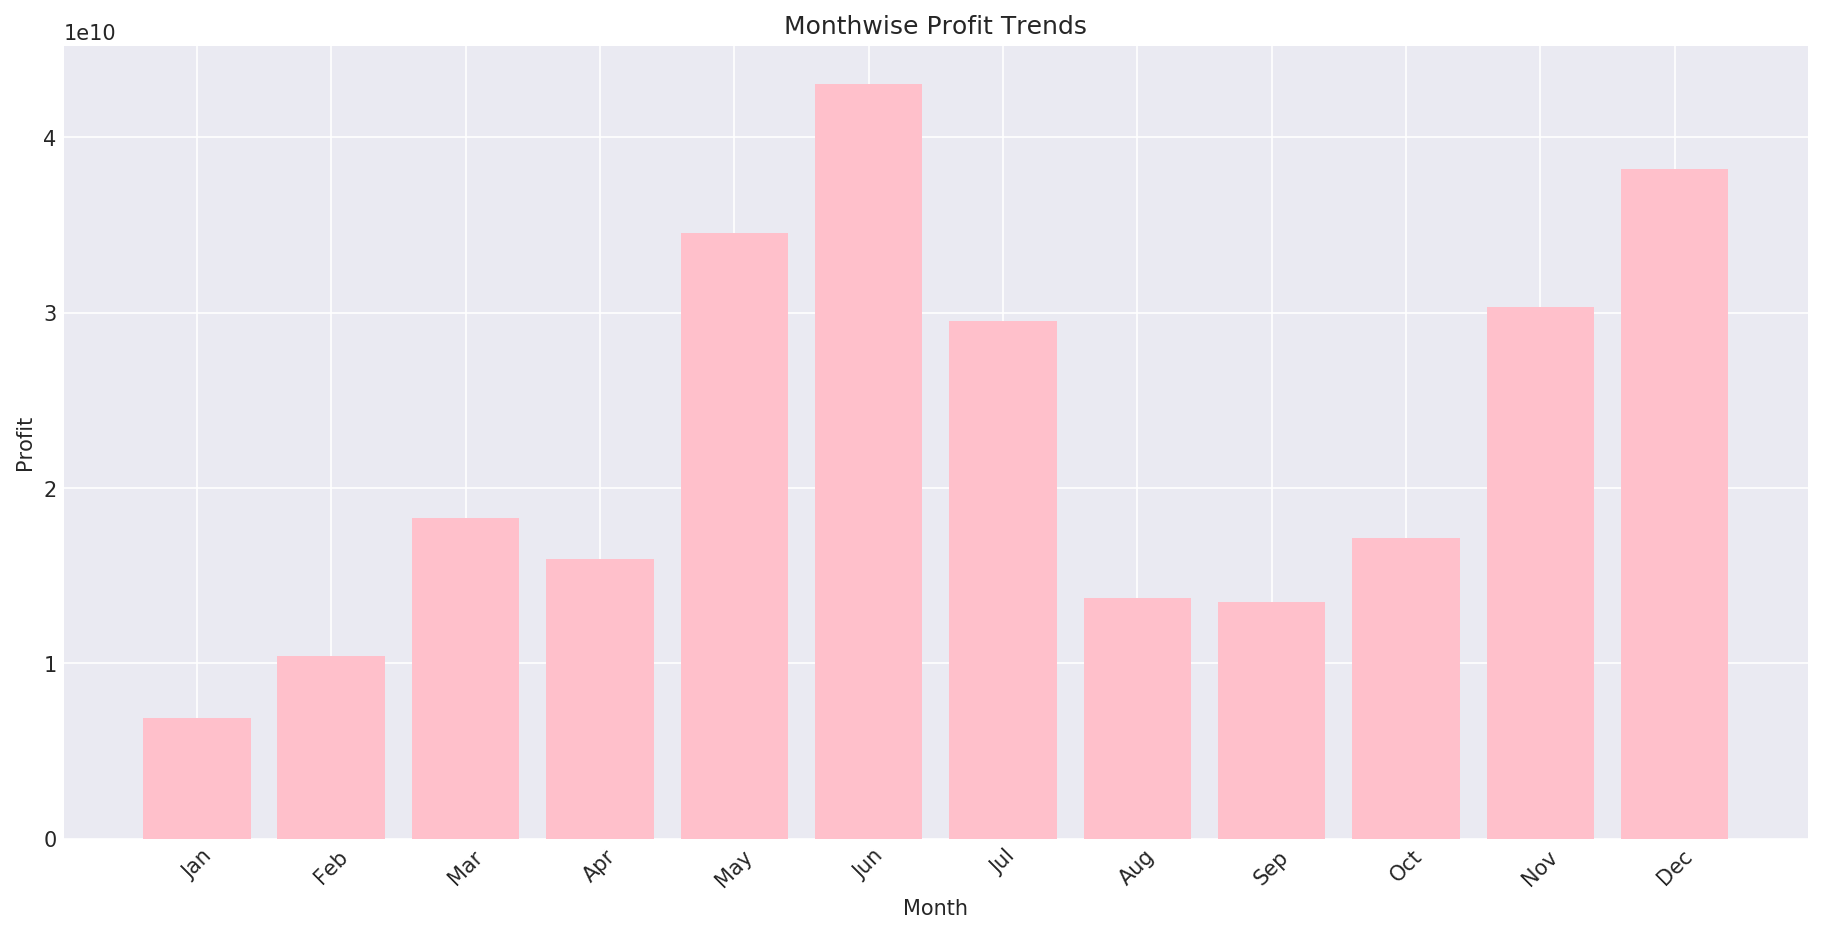

In [38]:
# Define graph size and dpi
plt.figure(figsize=(15,7), dpi=150)

# Define tick
plt_xtick_labels = ['Jan', 'Feb','Mar', 'Apr','May','Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(np.arange(12), plt_xtick_labels, rotation=45 )

# Set title
plt.title('Monthwise {} Trends'.format("Profit"))
# Set x axis label
plt.xlabel('Month')
#Set y axis label
plt.ylabel("Profit")

#Plot the bar chart
plt.bar(range(12), movies_month_wise_profit_df.values, color='pink');
plt.show();

**Before drawing any conclusion related to the trend we wanted to check if June and July doesn't have an abnormal number of released movies, which might be contributing in larger gross margin.**

In [39]:
# Find average number of release per month
avg_release_per_month = movies_df.groupby('release_month')['id'].count().mean()

print("Average number of release per month {}".format(int(round(avg_release_per_month))))

Average number of release per month 321


In [40]:
# Check Month wise release count

movies_df.groupby('release_month')['id'].count()

release_month
1     225
2     257
3     279
4     266
5     291
6     340
7     314
8     337
9     459
10    363
11    303
12    415
Name: id, dtype: int64

**June and December has a movie release count of 340 and 415 respectively. They seem to be normal comparing the average release count of 321.**

1. September (459) have more releases than December (415).
2. October (363) have more releases than June (321).

We can conclude that June and December give more gross profit comparing other months.

**Few important observations from months gross profit bar graph:**
1. June is the most profitable month following December.
2. The number of movies releasing in these months is normal.
3. It looks like more people are watching movies in these months due to holidays in the US.

<a id="q5"></a>
#### Q.5 Which actors (Cast), director and genre gives very high gross profit movies?

Let's find out the actors, director and genre whose movies consistently gives high gross profit.

We have to define high gross profit number before we move forward. Not all movies having revenue more than the budget will be considered high gross profit. 

We should find out the average gross profit of all profitable movie. 

>**A profitable movie is one whose gross profit is more than 0 or revenue is greater than budget.**

In our dataset, we have movies whose gross profit is less than 0. Let's filter them because they are not required.

In [41]:
# Find out all movies who have profit more than 0

movies_profit_df = movies_df.query('gross_profit > 0')

rows, cols = movies_profit_df.shape

print("There are {} movies with gross_profit more than 0".format(rows))

There are 2776 movies with gross_profit more than 0


**Let's find out the average gross profit among profitable movies. We will assume any movie earning more than average gross profit is a high gross profit movie.**

In [42]:
print("Average gross profit of {}".format(round(int(movies_profit_df['gross_profit'].mean()))))

Average gross profit of 103305250


**Average gross profit came around 100 million dollars.**

Now further narrow our movie dataset to have only those movies which have gross profit of more than 100 million dollars.

In [43]:
# Check how many movies are there with more than 100 million of profit

movies_profit_100_df = movies_df.query('gross_profit > 100000000')

rows, cols = movies_profit_100_df.shape

print("There are {} movies with gross_profit more than 100 million".format(rows))

There are 826 movies with gross_profit more than 100 million


**Out of 2776 profitable movies we have 826 movies with more than 100 million gross profit. It is a very good number.**

Let's create a common function for calculating the actor, director and genre count for these high gross profit movies. 

In [44]:
# Common function for calculting the actor, director and genre count for these high gross profit movies.
def display_its_occurances_count(movies_profit_100_df, column_name, what_name):
    
    # Concatinate all column name into single string, it will further used
    all_conatenated_str = movies_profit_100_df[column_name].str.cat(sep='|')

    # Now put all the values in a panda series seperately
    movies_profit_100_concat_series = pd.Series(all_conatenated_str.split('|'))
    # Now create a series of unique values and its count
    movies_profit_100_concat_series = movies_profit_100_concat_series.value_counts(ascending = False)
    
    #Print Top 10 items
    print("Top 10 {} with most high gross profit movies:\n".format(what_name))
    print( movies_profit_100_concat_series.head(10))

**Now find out the top 10 actors with high gross profit movies.**

In [45]:
# Using display_its_occurances_count common method to find out top 10 actors with high gross profit movies.
display_its_occurances_count(movies_profit_100_df, 'cast', 'Actor')

Top 10 Actor with most high gross profit movies:

Tom Cruise            23
Tom Hanks             19
Brad Pitt             18
Adam Sandler          17
Sylvester Stallone    16
Cameron Diaz          16
Will Smith            16
Bruce Willis          15
Samuel L. Jackson     14
Jim Carrey            14
dtype: int64


**It seems Tom Cruise takes the crown of the most bankable star with 23 movies with high gross profit.** 
It is then followed by Tom Hanks (19 movies) and Brad Pitt (18 movies).

**Now find out the top 10 directors with high gross profit movies**

In [46]:
# Using display_its_occurances_count common method to find out top 10 director with high gross profit movies.
display_its_occurances_count(movies_profit_100_df, 'director', 'Director')

Top 10 Director with most high gross profit movies:

Steven Spielberg      22
Robert Zemeckis       10
Michael Bay            8
Roland Emmerich        7
Ridley Scott           7
Quentin Tarantino      7
Tim Burton             7
David Fincher          7
Clint Eastwood         7
M. Night Shyamalan     7
dtype: int64


**It seems Steven Spielberg takes the crown of the most bankable director with 22 movies with high gross profit.** 
It is then followed by Robert Zemeckis (10 movies) and Michael Bay  (8 movies).

**Now find out the top 10 genres with high gross profit movies.**

In [47]:
# Using display_its_occurances_count common method to find out top 10 genres with high gross profit movies.
display_its_occurances_count(movies_profit_100_df, 'genres', 'Director')

Top 10 Director with most high gross profit movies:

Action             317
Comedy             299
Adventure          278
Drama              264
Thriller           233
Family             166
Science Fiction    148
Fantasy            144
Romance            132
Crime              112
dtype: int64


**Note: One movie shares multiple genre attributes hence the count seems very higher with only 826 movies in data set**

**It seems Action is the most popular genre with 317 movies with high gross profit.** 
It is then closely followed by Comedy (299 movies) and Adventure (278 movies).

<a id="q6"></a>
#### Q.6 Is there any relation between runtime and high gross profit movies?

We wanted to see if low, average or high runtime is required by a movie to yield the high gross profit.

Let's draw a scatter plot to show the relationship between gross profit and runtime of hight profit movies.

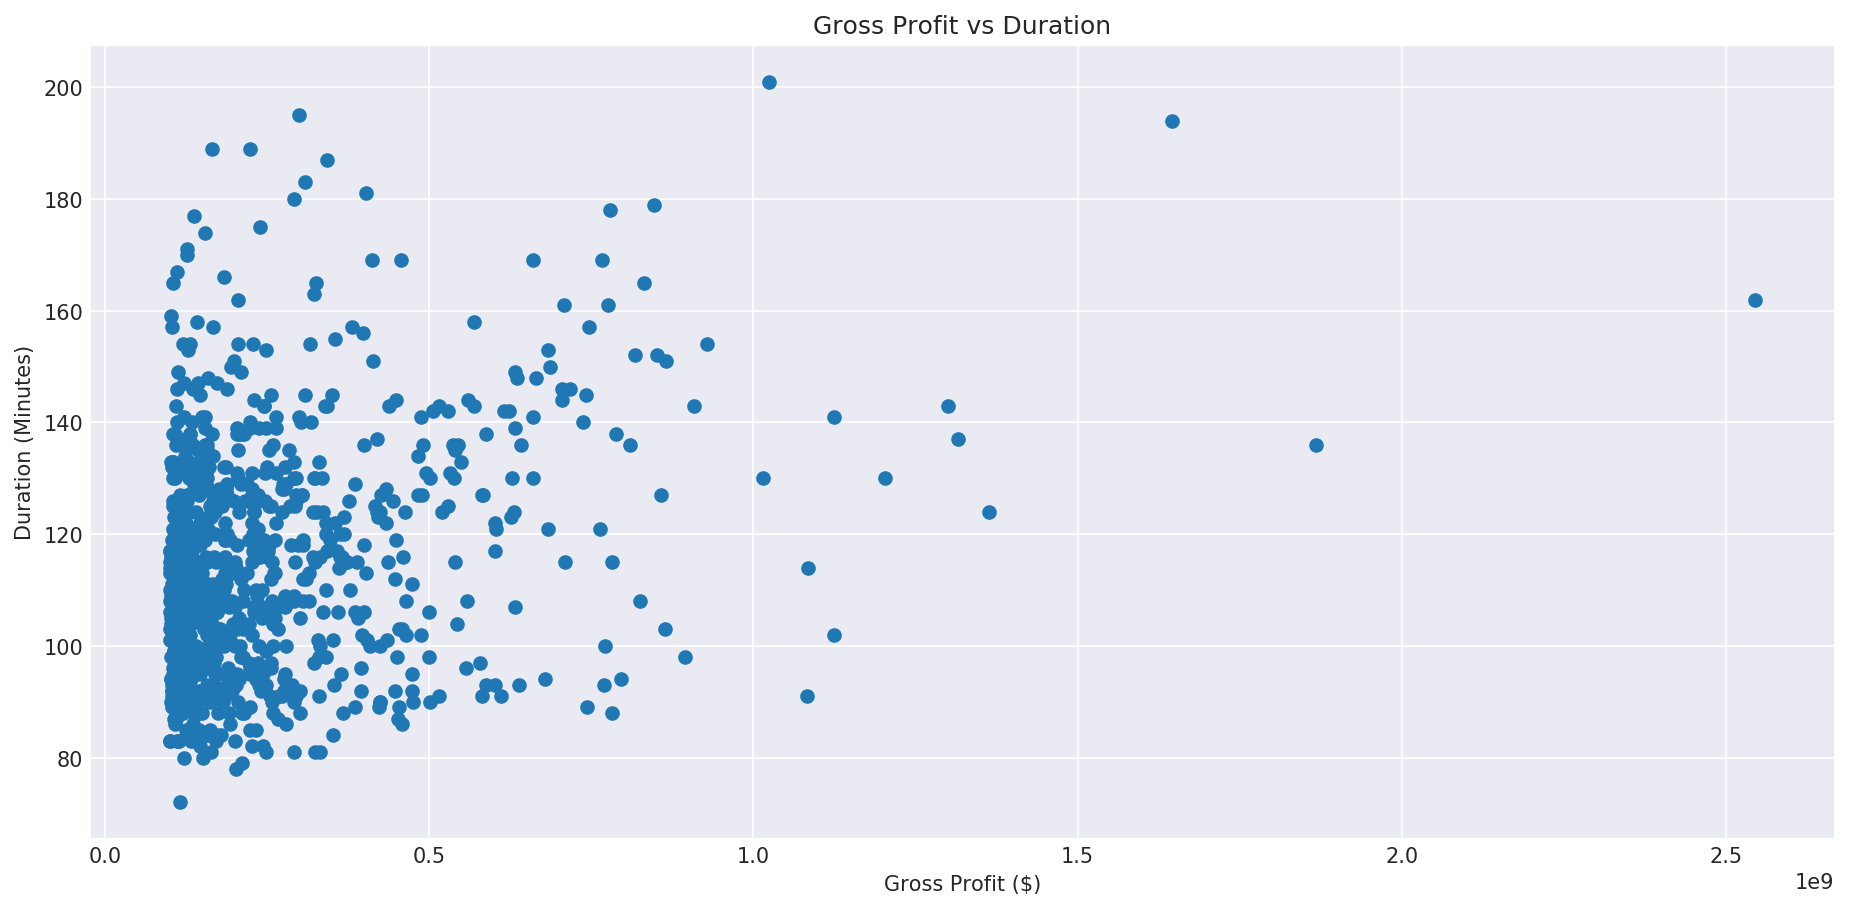

In [48]:
# Set chart size and dpi
plt.figure(figsize=(15,7), dpi=150)

# Set chart title
plt.title('Gross Profit vs Duration')

# Set x axis label
plt.xlabel('Gross Profit ($)')

# Set y axis label
plt.ylabel("Duration (Minutes)")

# Plot the scatter chart with gross profit and runtime of high profit movies
plt.scatter(movies_profit_100_df['gross_profit'], movies_profit_100_df['runtime']);

plt.show();

In [49]:
# Descriptive statistics on runtime
movies_profit_100_df['runtime'].describe()

count    826.000000
mean     115.628329
std       21.404868
min       72.000000
25%       99.000000
50%      113.000000
75%      128.750000
max      201.000000
Name: runtime, dtype: float64

**Few important observations from gross profit and runtime scatter plot:**

1. It seems runtime of high-profit movies is mostly close to 2 hours. 
2. However, movies with more than 500 million dollars in profit tend to be longer than 2 hours.
3. It seems there is no striking relation between runtime and profitability.

<a id='conclusions'></a>
## Conclusions

**List of assumptions:**

1. **runtime** is in minutes
2. **budget and revenue** values are in dollar currency

**List of limitations:**

1. The original dataset consists of around 10866 movies. After cleaning up (dropping rows with duplicates, null values and zero values) dataset shrink to 3849. The smaller size of the dataset may lead to wrong conclusions. Hence our conclusions are based on this small dataset and may not resemble with real scenarios.
2. Most of the drawn facts are informational and trends. They may not lead to causation. Hence this information should be used cautiously.
3. We have used 100 million dollars in gross profit as a benchmark for declaring a very high-profit movie. It may impose a limitation for people who are seeking to increase or decrease this benchmark.
4. We have not used money inflation-adjusted budget and revenue. In most of the article we came across related to the business of movies, they use a similar strategy. However, if we may use money inflammation adjusted budget and revenue outcome will be different and we may observe the growth slower than now.

**Summary:**

This data analysis provides valuable information for people who are outside the movie industry as well as inside.

These outside people may be potential investors, economist, media people and general movie enthusiasts. Our analysis during answering questions to the **growth of movie industries** provide the following valuable facts:

1. The movie industry is growing in size, budget and gross profit at rapid speed year on year. There are very few industries who will see such growth. Hence it makes Movie industry a great destination for the great return of investment.
2. In recent year, for e.g. with an overall investment between 7 to 8 billion dollars have yielded a gross profit of 17 to 19 billion dollars. It's around 250% return on investment. There are very few industries which can give such a result.
3. The movie industry has seen steep growth in terms of the number of movies releases, budget and gross profit after 1990. We can conclude that there was tremendous growth in the number of ticket sales as well as investment altogether.
4. However, the number of movies who are not profitable is still is at least half of all the movies released. Hence it has its own share of risk involved.

We have done the analysis to **reveal the relation between high gross profit and other movie attributes like release month, runtime, actor, director and genre.** This information is very important for people who are working inside the movie industry so they can use them to increase the chance of getting the very high return on investment (More than 100 million dollars):

1. A movie released in the month of **June** or in **December** yield more gross profit than other months. Increase your chance of getting more ROI by releasing the movie in these months. Both of months have several holidays and people use those time to watch the movie in a theatre.
2. **Tom Cruise, Tom Hanks and Brad Pitt** are the actors with the high number of high gross profit movies. Adding them in your movie cast have the advantage.
3. **Steven Spielberg, Robert Zemeckis and Michael Bay** are directors with the high number of high gross profit movies. Bring them onboard to take the advantage of more chance to get higher ROI.
4. **Action, Comedy, Adventure, Drama and Thrillers** are the genre which yields the high number of high gross profit movies. Making movies in this genre or combination of this genre have the advantage.
5. We have not observed any impact of runtime on the profitability of movies. Keep your movies between 80 minutes to 180 minutes, however, there are several outliers who go beyond these numbers yet yield good profit.

Use all the provided informations to make good decision regarding investing in industry or making high profit movies.

## References

1. [Python pandas, how to widen output display to see more columns?](https://stackoverflow.com/questions/11707586/python-pandas-how-to-widen-output-display-to-see-more-columns)
2. https://www.the-numbers.com/movie/budgets
3. https://io9.gizmodo.com/5881236/the-way-we-measure-box-office-success-is-completely-broken 
4. https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0071226 
5. https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html
6. https://io9.gizmodo.com/5747305/how-much-money-does-a-movie-need-to-make-to-be-profitable
7. https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html
8. https://erikrood.com/Python_References/extract_month_year_pandas_final.html